In [1]:
import sys, os


from composerml.models.mlpmusicgen import MLPMusicGen
from composerml.training.musictrainer import MusicTrainer
from composerml.music_generation import MusicDataset, MidiDatasetLoader, PlaySong, MusicAnalysis
from os import path
import sys, os


# Initializing a simple model with context length of 2 (take in 2 notes and output the next note) and two hidden layers of size 4
simple_model = MLPMusicGen(context_length= 2, hidden_sizes= [4,4])

#Creating a music trainer that takes in this model
trainer = MusicTrainer(simple_model)

#Creating an object containing the training data
#train_data contains x's as sequences of 2 notes, and y's as the next note following each sequence of 2 notes
train_data = MusicDataset('./example_music/', context_length=2)

pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
Trainer initialized for classification task using CrossEntropyLoss loss.


In [2]:
print(f"Example input: {train_data.x[0]} -> Example output: {train_data.y[0]}")

Example input: [65, 76] -> Example output: 79


In [3]:
#Use the trainer to fit the model 
trainer.fit(train_data.encoded_x,train_data.encoded_y, batch_size=1, epochs=10)


Epoch 1/10, Loss: 5.1309
Epoch 10/10, Loss: 3.9853


In [4]:
# Generating music piece, user specify which song/file to use as seed and how much of the seed to use
# The model will continue that song until it reaches the specified max length
file_path = './example_music/ashover1.mid'

# Using the model to generate a music piece
# File_name is the seed music file,
# Song_part is what portion of the music file to use as seed (1 means the whole music file, 0.5 means half of the music file, etc)
ashover_notes_simple= simple_model.generate_piece(
    max_len=100,
    file_name=file_path,
    song_part=1
)

In [5]:
#Initiating the player to generate and play the midi file
player = PlaySong() 

In [6]:
#Player can generat midi file from a list of notes 
player.generate_midi(ashover_notes_simple,'./model_output_examples/ashover1_simple_model.mid')

In [8]:
#Playing the generated midi file with player
player.play_midi('./model_output_examples/ashover1_simple_model.mid')   

In [9]:
# Importing a trained model, with a set of pretrained weights to generate music
# This pre trained model contains more than 250,000 parameters and was trained on a dataset of 50 different midi files
from composerml.models import TrainedMusicGen
trained_model = TrainedMusicGen()

# Generating music piece using the trained model, setting max length of generated piece to 100 notes, using the entire song as a seed
# This model the contains a lot of parameters, this would take around 5 minutes to run
ashover_notes_trained = trained_model.generate_piece(max_len=100, file_name='./example_music/ashover1.mid', song_part=1)

#Convert the output notes into a midi file
player.generate_midi(ashover_notes_trained,'./model_output_examples/ashover1_trained_model.mid')

Model parameters loaded successfully.


In [10]:
#Play the midi file- last 30 notes are generated
player.play_midi('./model_output_examples/ashover1_trained_model.mid')


In [11]:
#Generating Chopin Op23 using trained model- last 20 notes are generated
chopin_notes_trained = trained_model.generate_piece(max_len=100, file_name='./example_music/chopin_op23_original.mid', song_part=1)

#Convert the output notes into a midi file
player.generate_midi(chopin_notes_trained,'./model_output_examples/chopin_op23_trained_model.mid')

In [12]:
#Original song- first 80 notes
player.play_midi('./example_music/chopin_op23_original.mid')

In [13]:
# Playing the generated midi file
player.play_midi('./model_output_examples/chopin_op23_trained_model.mid')

In [14]:
#Analysing the outputs 
data = MidiDatasetLoader('./model_output_examples')
# outputs a list of list (one list for every song in the folder)

songs = data.songs


In [15]:
analysis1 = MusicAnalysis(songs[0]) #song 1 is the original chopin piece containing 80 notes
analysis2 = MusicAnalysis(songs[2]) #song 3 is the generated chopin piece using trained model containing 100 notes

In [16]:
count1 = analysis1.count_notes()
riffs1 = analysis1.riffs()
pitch1 = analysis1.pitch()

count2 = analysis2.count_notes()
riffs2 = analysis2.riffs()
pitch2 = analysis2.pitch()

   note  count
36  BS1    1.0
38   D2    1.0
39  DS2    1.0
44  GS2    2.0
46  AS2    1.0
48  BS2    2.0
50   D3    1.0
51  DS3    3.0
55   G3    3.0
56  GS3    3.0
58  AS3    3.0
60  BS3    4.0
62   D4    4.0
63  DS4    7.0
65  ES4    2.0
66  FS4    4.0
67   G4    6.0
68  GS4    2.0
69   A4    1.0
70  AS4    4.0
72  BS4    3.0
74   D5    3.0
75  DS5    4.0
77  ES5    2.0
78  FS5    4.0
79   G5    4.0
80  GS5    1.0
81   A5    1.0
82  AS5    2.0
84  BS5    1.0
Most common riff: G5-G4-FS5 with count 2
Average note value is 64.9 which is between E4 and ES4
   note  count
36  BS1    1.0
38   D2    1.0
39  DS2    1.0
44  GS2    2.0
46  AS2    1.0
48  BS2    2.0
50   D3    1.0
51  DS3    3.0
55   G3    7.0
56  GS3    3.0
58  AS3    3.0
60  BS3    6.0
62   D4    4.0
63  DS4   11.0
65  ES4    2.0
66  FS4    4.0
67   G4   12.0
68  GS4    2.0
69   A4    1.0
70  AS4    4.0
72  BS4    5.0
74   D5    3.0
75  DS5    4.0
77  ES5    2.0
78  FS5    4.0
79   G5    6.0
80  GS5    1.0
81   A5    1.0
82  

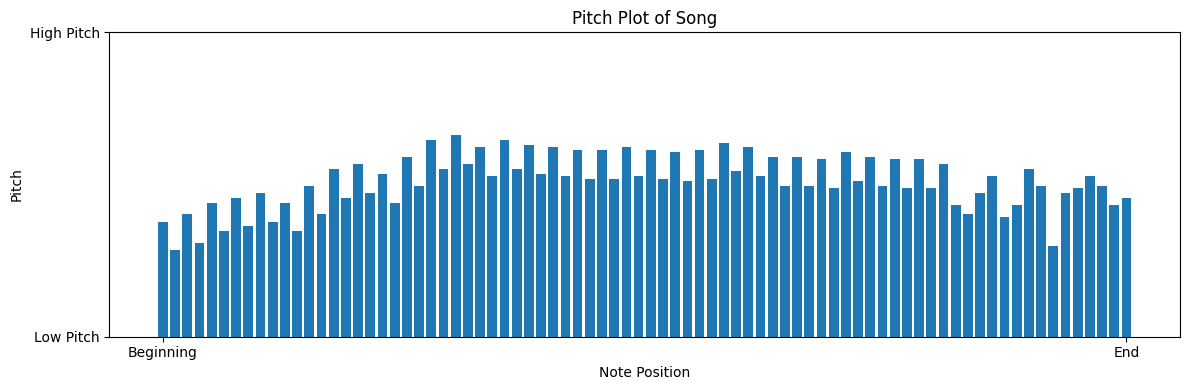

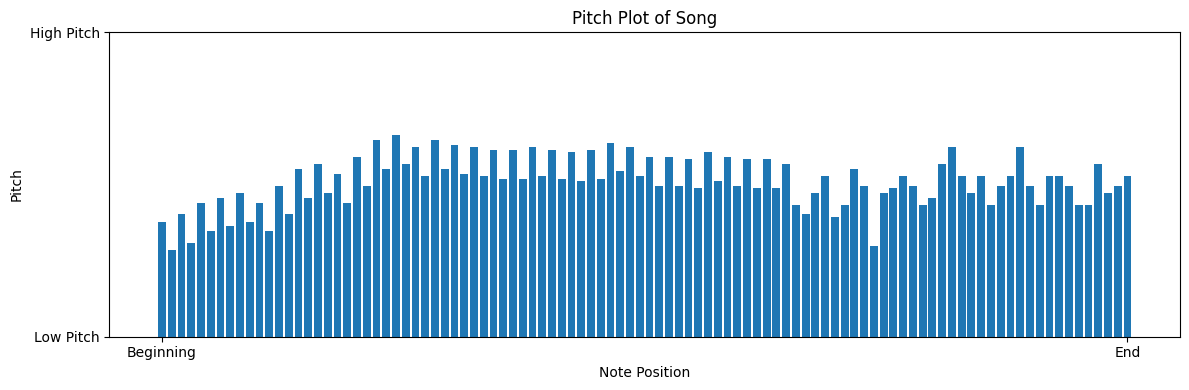

In [17]:
analysis1.plot_music()
analysis2.plot_music()
#The plots should look similar in shape since they are both chopin pieces, but the generated one has more notes, 20 notes added to the end


   note  count
36  BS1    1.0
38   D2    1.0
39  DS2    1.0
44  GS2    2.0
46  AS2    1.0
48  BS2    2.0
50   D3    1.0
51  DS3    3.0
55   G3    3.0
56  GS3    3.0
58  AS3    3.0
60  BS3    4.0
62   D4    4.0
63  DS4    7.0
65  ES4    2.0
66  FS4    4.0
67   G4    6.0
68  GS4    2.0
69   A4    1.0
70  AS4    4.0
72  BS4    3.0
74   D5    3.0
75  DS5    4.0
77  ES5    2.0
78  FS5    4.0
79   G5    4.0
80  GS5    1.0
81   A5    1.0
82  AS5    2.0
84  BS5    1.0


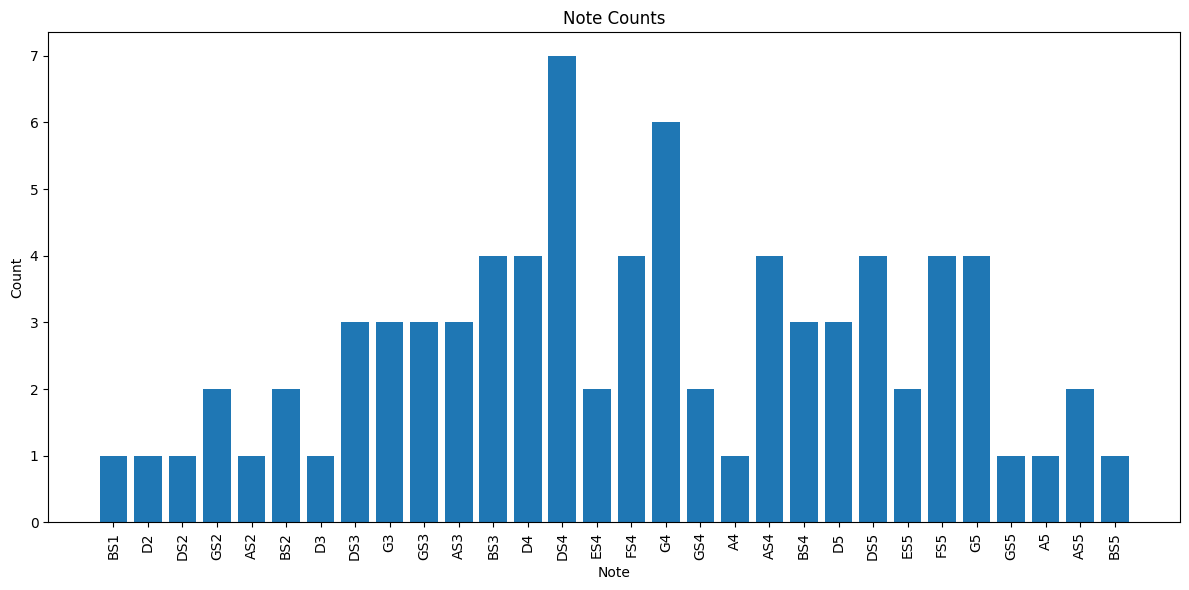

   note  count
36  BS1    1.0
38   D2    1.0
39  DS2    1.0
44  GS2    2.0
46  AS2    1.0
48  BS2    2.0
50   D3    1.0
51  DS3    3.0
55   G3    7.0
56  GS3    3.0
58  AS3    3.0
60  BS3    6.0
62   D4    4.0
63  DS4   11.0
65  ES4    2.0
66  FS4    4.0
67   G4   12.0
68  GS4    2.0
69   A4    1.0
70  AS4    4.0
72  BS4    5.0
74   D5    3.0
75  DS5    4.0
77  ES5    2.0
78  FS5    4.0
79   G5    6.0
80  GS5    1.0
81   A5    1.0
82  AS5    2.0
84  BS5    1.0


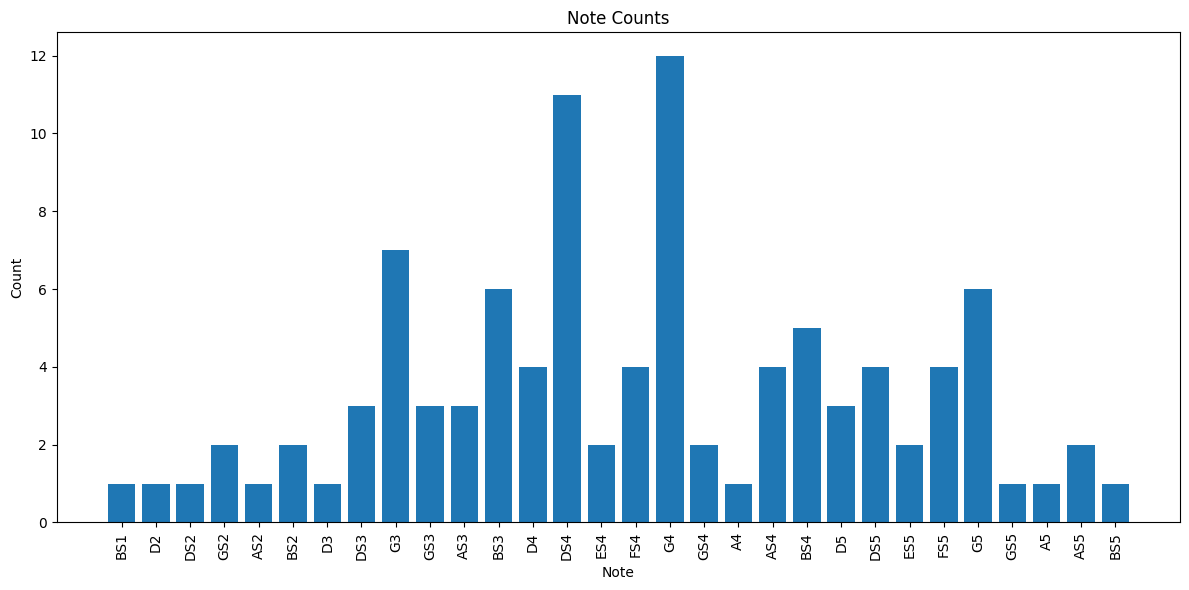

In [18]:
analysis1.counts_plot()
analysis2.counts_plot()